# Ch2: Probability, Entropy, and Inference

**Definition:** An **ensemble** $X$ is a triple $(x,{\cal {A}}_X , {\cal P}_X)$ where the outcome $x$ is the value of a random variable that takes on one of the values in the finite set ${\cal A}_X = \{a_i\in \mathbb{R}\, |\, i \in \{1,\dots,I\}  \}$ with probailities $P(x=a_i) = p_i$ in ${\cal P}_X = \{ p_1,\dots,p_I \}$ satisfying $\sum_i p_i =1$. 

Note: $x$ then stands for what I have learned to call a random variable. 

# Part I: Data Compression 

# Ch4: The Source Coding Theorem

**Definition** The **Shannon information content** $h(x)$ of an outcome $x$ from an ensemble $X$ is $$h(x):=\log_2\left( \frac1{P(x)} \right).$$ 

Notes: 
- The Shannon information content is just called information for short. 
- I believe that events, as in sets of outcomes, have information too.
- The units of inforamtion are called bits, and there is some motivation to conflate the following two words
    - bits: number of binary digits in a string 
    - bits: the negative log probability of an outcome from an ensemble
- Namely, if an enselble $X$ has ${\cal A}_X$ the set of all $2^8$ strings of 8 bits, and $p_i=1/2^8$ so the outcomes are equiprobable, then the infromation content of an outcome is 
$h(x)
=\log_2\left( \frac{1}{p_i}\right)
=\log_2\left( \frac{1}{1/2^8 }\right)
=8\,{\rm bits}.$

**Definition** The **entropy** $H(X)$ of the ensemble $X$ is the expected value of the information; 
$$
H(X) = \sum\limits_{x\in {\cal A}_X} P(x)\log\left(\frac1{P(x)}\right).
$$

Motivations for these definitions of information and entropy: 
1. Information decreases with increasing probability; low probability outcomes reveal more information.
2. If two random variables $x,y$ are independent then 
    1. the information content of an outcome $(x,y)$ from their joint ensemble is the sum of the informations of the outcomes from the indivisual ensembles; 
    $$P(x,y) = P(x)P(y) \\
    \Rightarrow h(x,y) 
=\log_2\left( \frac{1}{P(x)P(y)}\right) \\
=\log_2\left( \frac{1}{P(x)}\right) 
+\log_2\left( \frac{1}{P(y)}\right) \\
=  h(x) + h(y).$$
    2. the entropy of a joint ensemble from two independent ensembles is the sum of the entropys of the individual ensembles;
    
$$ H(X,Y) = \sum P(x,y)\log_2(1/P(x,y)) \\
= \sum_{x,y}P(x)P(y) \log_2(1/P(x)) + \sum_{x,y}P(x)P(y)\log_2(1/P(y)) \\
= \sum_{x}P(x) \log_2(1/P(x)) + \sum_{y}P(y)\log_2(1/P(y))  \\
= H(X) + H(Y) 
$$
3. Entropy is maximized by uniform probaility, 
$$\nabla\left[ \sum_i p_i \log_2(p_i)  +\lambda \left(\sum_i p_i -1\right ) \right] = 0 \Rightarrow p_i = \frac1N.$$

4. Entropy is minimized to 0 with any $p_i=1$




### 4.1 Information content of a random variable
Characterizing informaton: 

What is maximumm entropy? The expected information from a random experiment is largest if the probability distribution over outcomes is uniform. 
- As in questions in 20 questions that split the world into two parts of equal 'size'.
    - In the simpler, more quantifiable game of '20 questions for a number between 0 and $2^6-1', each question can exclude half the possibilities, and the booleans written as a string form the binary representation of the secret number. So 6 questions are needed and the information obtained from the 6 questions is binary for the secret number. 

- As with the minimizing the number of weighing experiments for 12 balls, 1 ball with unique weight to be identified, the three outcomes designed to have as close to equiprobability as possible.  

Information obtained in a sequence of experiments is independent of the sequence of experiments:
- In BattleShip with a boat on 1 of 64 squares, The inforamation gathered when the first $N$ attempts, all of which are misses, is 
$$h = 
-\log_2\left( 
\frac{63}{64}
\frac{62}{63}
\cdots
\frac{64-N}{65-N}
\right)
=
-\log_2\left( 
\frac{64-N}{64}
\right)
$$
while the information gained when the $N+1$th attempt is a hit is $-\log_2\left( \frac{1}{64-N} \right)$
For a total information of 
$$
-\log_2\left( \frac{1}{64} \right) = 6$$

which is exactly the number of bits required to encode the position of one of the $2^6$ squares. 

Note: The successfull shot at the end was lower probaibility and gave more information than the higher probability missing shots. 

### 4.2 Data Compression

**Definition:** The **raw bit content** $H_0(X)$ of the ensemble $X$ is $\log_2(|{\cal A}_X|)$.

Interpretation: The raw bit content is a lower bound on the number of binary questions needed to identify an outcome in the ensemble $X$. That is, of course more bits can do it, but the ceiling of the raw bit content is the minimum number of bits. 

### 4.3 Information content defined in terms of lossy compression

**Definition:** A **smallest $\delta$-sufficent subset** $S_\delta$ of the set of outcomes ${\cal A}_X$ of the ensemble $X$ is a smallest subset of ${\cal A}_X$ satisfying $P(x\in S_\delta)\geq 1-\delta $. 

**Definition** The **essential bit content** $H_\delta(X)$ of the ensemble $X$ is the function of $\delta$ defined in terms of the smallest $\delta$-sufficient subset as $H_\delta(X) = \log_2|S_\delta|$.

Interpretation: If you are willing to not encode some of the outcomes, and in particular are willing to tollerate a probability $\delta$ of not encoding one, then you have fewer outcomes to encode in binary, and thus need fewer digits. The essential bit content provides a lower bound on the number of biary symbols needed when you are willing to tollerate loss of symbols with probability $\delta$. 

**e.g.**  
Some number $N$ IID Bernoulli $x = (x_1,\dots,x_n)$ with $p_1=0.1$ form a binomial ensemble $X^N = (x,A,P)$. The statistic $r(x) = \sum x_i$ has small  expectation value because $p_1$ is small; large sums are improbible. The probability distribution of $x$ is $P(x) = p_0^{N-r(x)} p_1^{r(x)}$. We will find the essential bit content of the ensemble $X^N$. To do this we find $S_\delta$, which is a subset of $\{x_1,\dots,x_n\,|\,x_i\in\{0,1\} \} $. Because of the small value of $p_1$, we obtain $S_\delta$ by excluding some of the $x$ with large sums. Thus, $S_\delta$ contains all of the $x$ with $r(x) \in \{0,1,\dots,r_{\rm max}(\delta) -1\}$, and to avoid discarding too many outcomes and making the probability of missing encodeing too large, some of the $x$ with $r(x)=r_{\rm max}(\delta)$. 

Consider the graph of $H_\delta(X^n)=\log_2|S_\delta|$ vs $\delta$. 

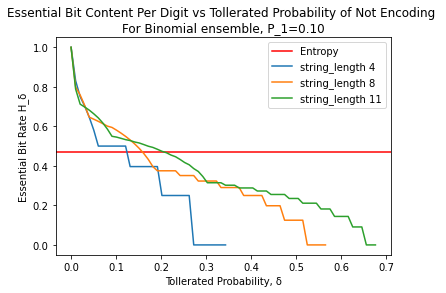

In [42]:
import matplotlib.pyplot as plt
import numpy as np

# Reminder: string length 14 takes longer than you'd like
p0 = 0.9
p1 = 1-p0

H = p0*np.log2(1/p0) + p1*np.log2(1/p1)
number_of_deltas = 100
deltas = np.linspace(0,1,number_of_deltas)

def binary_strings(string_length):
    """Generate all binary strings of specified length."""
    binary_numbers = [bin(i)[2:] for i in range(2**string_length)]
    binary_strings = ['0'*(string_length-len(num))+num 
                      for num in binary_numbers]
    return binary_strings

def string_probability(s):
    """Calculate the probability of the string."""
    string_length = len(s)
    number_of_ones = len(s.replace('0',''))
    probability_of_ones = p1**number_of_ones
    probability_of_zeros = p0**(string_length - number_of_ones)
    probaiblity_of_string = probability_of_ones * probability_of_zeros
    return probaiblity_of_string

    
def string_probabilities(strings):
    probs = [string_probability(s) for s in strings]
    # print(sum(probs))
    assert np.isclose(sum(probs) , 1.0)
    return probs

def cardinality_of_s_delta(delta, string_length):
    """Calculate the cardinality of s_delta from the list of probabilities."""
    probs = string_probabilities(binary_strings(string_length))
    while sum(probs) > 1 - delta:
        probs.pop( probs.index(min(probs)))
    return len(probs)

def cardinalities(string_length):
    return [cardinality_of_s_delta(delta,string_length) for delta in deltas]

def essential_bit_contents(string_length):
    cards = cardinalities(string_length)
    return [np.log2(card) if card != 0 else None for card in cards]



plt.axhline(y=H, color = 'red', label = 'Entropy')
plt.title('Essential Bit Content Per Digit ' 
          + 'vs Tollerated Probability of Not Encoding \n'
         + f'For Binomial ensemble, P_1={p1:.2f}')
plt.xlabel('Tollerated Probability, \u03B4')
plt.ylabel('Essential Bit Rate H_\u03B4')
for string_length in [4,8,11]:
    ebcs = essential_bit_contents(string_length)
    essential_bit_rates = [ebc/string_length if ebc is not None else None 
                           for ebc in ebcs ]
    plt.plot(
        deltas,
        essential_bit_rates, label = f'string_length {string_length}'
        )
plt.legend()    
plt.show;

As delta increases, $S_\delta$ shrinks and so does the essential bit content. 

For example, in $X^{10}$ there are $2^{100}$ outcomes. As $\delta$ increases from zero
- the essential bit content is a constant of 1 until $\delta = p_1^{100}$, the probability of the lowest probability event. 
    - When delta crosses that line, the event $x=(1,\dots,1)$ is the first to go from $A$ to create $S_\delta$,  
    - and $r_{ \rm min }$  drops to 99. 
- Next, when $\delta$ gets to $p_1^{100} + p_1^{99}p_0$, the probability of the next smallest probability event, there are ${{100}\choose{1}} =100$ events $x$ with $r(x)=99$, 
    - any one of them can be dropped to get $S_\delta$.
    - $r_{\rm min}$ does not change from $99$.

- As $\delta$ goes up to $p_i^{100} + n p_i^{99}p_0$ for $n<{{100}\choose{1}}=100$... 
    - we drop more elements with exactly one 0 and thus probability $p_1^{99}p_0$, 
    - all the while $r_{\rm min} = 99$.   
    - $r_{99}:=\frac{\Delta |S_\delta|}{\Delta \delta } = -\frac{1}{p_i^{99}p_0}$ is constant and negative while this happens, 
    - so $H_\delta = \log(2^{99}-r_{99}\delta)$ where $2^{99}$ is the size of the set $S_\delta$ just before $r_{rm min}$ dropped to $99$.

- For $\delta$ to increase beyond $p_1^{100}+100p_1^{99}p_0^1$, the value of  $r_{\rm min}$ must decrease by 1. 
    - there are ${{100}\choose{2}}$ elements with probability $p_1^{98}p_0^2$ to remove at that value.
    - $r_{\rm min}$ is constant while they are removed
    - $r_{98} = \frac{\Delta |S_\delta|}{\Delta \delta } = \frac{1}{p_1^{98}p_0^2}$ is constant and negative while this happens, 
    - so $H_\delta \sim log(2^{98}-r_{98}\delta)$ where $2^{98}$ is the size of the set $S_\delta$ when $r_{rm min}$ dropped.
- ... etc, giving a piecewise logapithmic function, one piece for each value of $r_{\rm min}$.
- When $\delta$ crosses $1-(p_1)^{1}(p_0)^{99}$ the last of the elements must be dropped, leaving $S_\delta =\{\}$.

In summary, there are 
1. many small steps down where $|S_\delta|$ decreases with constant $r_{\rm min}$
2. cusps where $r_{\rm max}$ changes; these are places where the rate $\frac{\Delta |S_\delta|}{\Delta \delta}$ of loss of elements per unit $\delta$ changes from one constant $p_0^{N-r(x)} p_1^{r(x)}$ to another $p_0^{(N-1)-r(x)} p_1^{r(x)+1}$.  
    1. because $H_\delta(X^N)$ is logarithmic, the graph is piece wise logarithmic.

Message: For large $N$ the blue curve approaches the constant function $NH$ where $H$ is the entropy of a single ranfom variable. That is, for large $N$, compression of strings of $N$ bits any number more than $NH$ bits is possible with very small probability of error $\delta$, but compression to less than $NH$ bits  makes loss of information almost certain. 

**Theorem** (Shannon's source coding theorem) Let $X$ be an ensemble with $H(X)=H$. For all $\epsilon>0$ and $\delta\in(0,1)$ there exists $N_0\in\mathbb{N}$ such that for all $N>N_0$ 
$$
\left|  \frac{1}{N}H_\delta(X^N) - H \right| < \epsilon.
$$

He Thinking: If $H=1$ as for an equiprobable distribution on two outcomes, then no compression is possible, but for any distribution that does not maximize entropy, compression is possible. For $I$-nary outcomes, the equiprobable distribution ensemble has entropy $\log_2(I)>1$, and the probability distribution needs to be non-uniform enough for $H$ to be less than 1 for compression to happen. 

### 4.4 Typicality 
Why does increasing $N$ help in the ability to have good encodings?

Consider a binomial random variable  $X^N$ (sum of Bernoulli random variables). As $N$ increases (the size of the random sample)
- the mean number of 1s scales as $N$ 
- the variance of number of 1s scales as $\sqrt N$

so the approximare value of $r \sim p_1 N  \pm \sqrt{p_0p_1}\sqrt{N}$, so that the relative error $\frac{\sqrt{p_0p_1}\sqrt{N}}{p_1 N } \to 0$ as $N\to \infty$.

That is, for large values of $N$ we have smaller relative error; we have a good idea of what is typical. 

For a multinomial distribution (sum of categorical random variables) with probabilities $(p_1,\dots,p_I)$ the expected number of elements in category $i$ is $Np_i$. Thus, the probability of a typical string is 
$$
P(x)_{typical} \approx \prod\limits_{i=1}^I p_i^{(p_iN)}
$$
and the information content of a typical string is 
$$h(x)_{typical} \approx \log_2\left(\frac1{P(x)_{typical}} \right)\\
=N \sum_i p_i \log_2(1/p_i) = NH.
$$

Flipping that around, we define typical elements to be the strings $x$ that have $P(x) \approx 2^{-NH}$ with 'close' quantified by a parameter $\beta$.

**Definition** The **set of typical elements** of the random sample ensemble $X^N$ from the random variable $X$ with $H(X)=H$ is the set 
$$T_{N\beta} = 
\left\{ x\in{\cal A}_{X^N}\,:\, \left| \frac1N \log_2 
\left( \frac{1}{ P(x) } \right) - H \right| < \beta\right\}.
$$.


Interpretation: For any $\beta$,  this set will contain almost all the probability for sufficiently large $N$. 

**Theorem (The asymptotic equipartition principle)** For an ensemble $X^N$ of $N$ IID random variables with $N$ sufficiently large, the outcome $x=(x_1,\dots,x_N)$ is almost certain to belong to a subset of ${\cal A}_X$ having only $2^{NH(X)}$ on which the probability is almost uniformly $2^{-NH} for each element.

Note: If the entropy $H(X)$ and raw bit content $H_0(X)$ of the ensemble $X$ satisfy 
$$H(X)< H_0(X)$$
then the set of typical elements is much smaller that the set of outcomes;
$$
2^{NH} \ll 2^{N H_0} = |{\cal A}_X|.
$$

# Ch5 Symbol Codes

Notation: $S^+$ stands for the set of strings of all finite lengths with letters from $S$. 

**Definition** A **binary symbol code** for an ensemble $X=(x,{\cal A},P)$ is a mapping $c: {\cal A}\to \{0,1 \}^+$.

**Definition:** The **codework** for the outcome $x$ is in the symbol code $c$ is $c(x)$.

**Definition** The **extended code** of the symbol code $c$ is the function $c^+: {\cal A} \to \{0,1\}^+$ such that $c^+(x_1x_2...x_N) = c(x_1)c(x_2)...c(x_N).$

**Definition** The code $c$ is **uniquely decodable** if $[\forall x,y \in {\cal A}^+] (x\neq y \Rightarrow c^+(x) \neq c^+(y)).$

**Definition** A **prefix code** is a symbol code with the property that no codework is a prefix of another codeword. 

**Definition** The **expected length** $L(c,X)$ of a symbol code $c$ for an ensemble $X$ is the expectation value of the length $l(c(x))$ of the encodeing $c(x)$; taht is $L(c,X) = \sum\limits_{x\in{\cal A} }^I P(x) l(c(x))$. 

**Theorem (The Kraft inequality)** For any uniquely decodable binary symbol code $c$ of the ensemble $X$, the codework lengths satisfy $\sum\limits_{i=1}^I 2^{-l_i} \leq 1$. 

**Definition** If a uniquely decodable code satisfies the Kraft inequality with equality then it is a **complete code**. 



**Theorem** The entropy of an ensemble $X$ is a lower bound on the expected length $L(c,X)$ of a symbol code $c$ for that ensemble; $H(X)\leq L(c,X)$ with equality holding only if the code lengths $l_i$ of the outcomes $a_i$ are the Shannon information $h(a_i) = \log_2(1/p_i)$ of the outcomes. 



**Definition** A symbol code is an **optimal symbol code** if $H(X) = L(c,X)$. 

Note: The codition for an optimal symbol code requires that all of the probabilities $p_i = 2^{-l_i}$ are powers of two. Thus, if any of the probabilities are not powers of 2 then the equality can not hold.  

**Theorem (The source coding theorem for symbol codes)** Every ensemble $X$ has a prefix code $c$ satisfying 
$H(X) \leq L(c,X) \leq H(X)+1$.

Note: If the probabilites are $\{p_i\}$ and the optimal probabilities $q_i = 2^{-l_i}$ then $L(c,X) = H(X) + \sum\limits_{i}p_i\log \left( \frac{p_i}{q_i} \right)$.

**Definition** The **relative entropy** or **Knullback-Lieber divergence** of two probability distributions $P,Q$ defined over the same alphabet ${\cal A}$ is 
$D_{KL}(P||Q) = \sum\limits_{x\in{\cal A}}P(x)\log\left( \frac{P(x)}{Q(x)} \right)$.

Notes... using some wikipedia and thus mixing notation: 
- $D_{KL}(P||Q) \geq 0$ with equality iff $P=Q$. This is called **Gibbs' inequality**
- $D_{KL}$ is not symmetric, so it is not quite an inner product on OR a distance between probability distributions over ${\cal A}$. 
- The Gibbs' inequality can be written as $\sum_i p_i \log(1/p_i) \leq \sum_i p_i \log(1/q_i)$, which can be read as the entropy of a distribution is less than the cross entropy between two distributions. 
- **Definition** The **cross entropy** $H(P,Q)$ of distriibution $Q$ relative to distribution $P$ is the expectation value of the information $\log_2(1/Q(x))$ under the distribution $P$, so that $H(P,Q) = \sum\limits_{x\in {\cal X}} P(X) \log(Q(x))$
- The cross entropy can be interpreted as the expected message length per dataum when an incorrect distribution $Q$ is assumed while the actual population has distribution $P$. 
- $L(c,(x,A,P))= H(P,Q) = H(Q) + D_{KL}(P||Q)$.

### 5.5 Huffman coding
The algorithm to design an optimal prefix code has two steps and repeat
1. Order by probabilities in the alphabet. These are leves in a tree graph constructed as follows
2. tree-like combine the two least probable letters into a single letter, labeling the branches 0 and 1.
3. repeat steps 1 and 2 untill all symbols have been combined into a root.

The code of a letter is obtained by traveling from the root to the leaf, thereby reading the binary digits in the reverse order from their construction. 



Note: Huffman encoding is optimal, whereas the idea of running experiments that both provide the max number of outcomes AND have as close to equiprobability of outcomes do not always provide optimal encoding. These are called greedy algorithms. That is, Huffman in reverse is NOT always greedy splitting. 

### 5.6 Disadvantages of Huffman encoding

1. Huffman does not take account of things like the fact that u is much more probable if q preceeds it.
2. $H(X) \leq L(c,X) < H(X)+1$, so we can incur up to 1 bit per symbol inefficiency in encoding strings of $N$ bits. That can add up to a lot if $N$ is large. 

One fix up is to encode blocks of symbols so that the inefficiency per block is less than 1 bit, and thus the max inefficiency per character goes down to $1/N$. But this cones at the cost of needing to know the probabilities of blocks, a real loss of elegance. 

# Ch6 Stream Codes